In [1]:
import pandas as pd
from tabulate import tabulate
import os

# Path to the CSV file
file_path = r'C:\Users\user\Documents\SLIIT\YEAR 4\SEM 1\Research\App\DataSet\Oshan\word_jumbling_dataset.csv'

# Checking if the file exists
if os.path.exists(file_path):
    print("File found. Loading data...")
    df = pd.read_csv(file_path)
    print("Data loaded successfully!")
else:
    print("File not found at the specified path.")
    print("Please make sure the file exists and the path is correct.")

# Get the count of rows in the DataFrame
num_rows = len(df)
print()
print(f"{num_rows} rows of data are available. Previewing prices of the first 50 rows:")

# Displaying the first 50 rows of the DataFrame in a tabular format
print(tabulate(df.head(50), headers='keys', tablefmt='pretty'))

File found. Loading data...
Data loaded successfully!

427 rows of data are available. Previewing prices of the first 50 rows:
+----+----+-----+----+----+-----+----+-----+-----+--------------+-------+
|    | ID | Age | IQ | Q1 | Q2  | Q3 | Q4  | Q5  | Time Seconds | Label |
+----+----+-----+----+----+-----+----+-----+-----+--------------+-------+
| 0  | 1  | 10  | 5  | Y  |  N  | N  |  N  |  N  |      60      |   Y   |
| 1  | 2  | 10  | 5  | Y  |  Y  | Y  |  Y  | nan |      75      |   N   |
| 2  | 3  | 10  | 4  | N  |  N  | N  |  N  |  N  |      62      |   Y   |
| 3  | 4  | 10  | 5  | Y  |  Y  | Y  |  Y  |  Y  |     100      |   N   |
| 4  | 6  | 10  | 3  | N  |  N  | N  |  N  |  N  |      20      |   Y   |
| 5  | 5  | 10  | 4  | Y  | nan | N  | nan | nan |     127      |   Y   |
| 6  | 9  | 10  | 4  | Y  |  Y  | Y  |  Y  |  Y  |     170      |   N   |
| 7  | 10 | 10  | 4  | Y  |  Y  | Y  |  Y  |  Y  |     109      |   N   |
| 8  | 11 | 10  | 4  | N  |  N  | N  |  N  |  N  |      70 

## Data Visualization

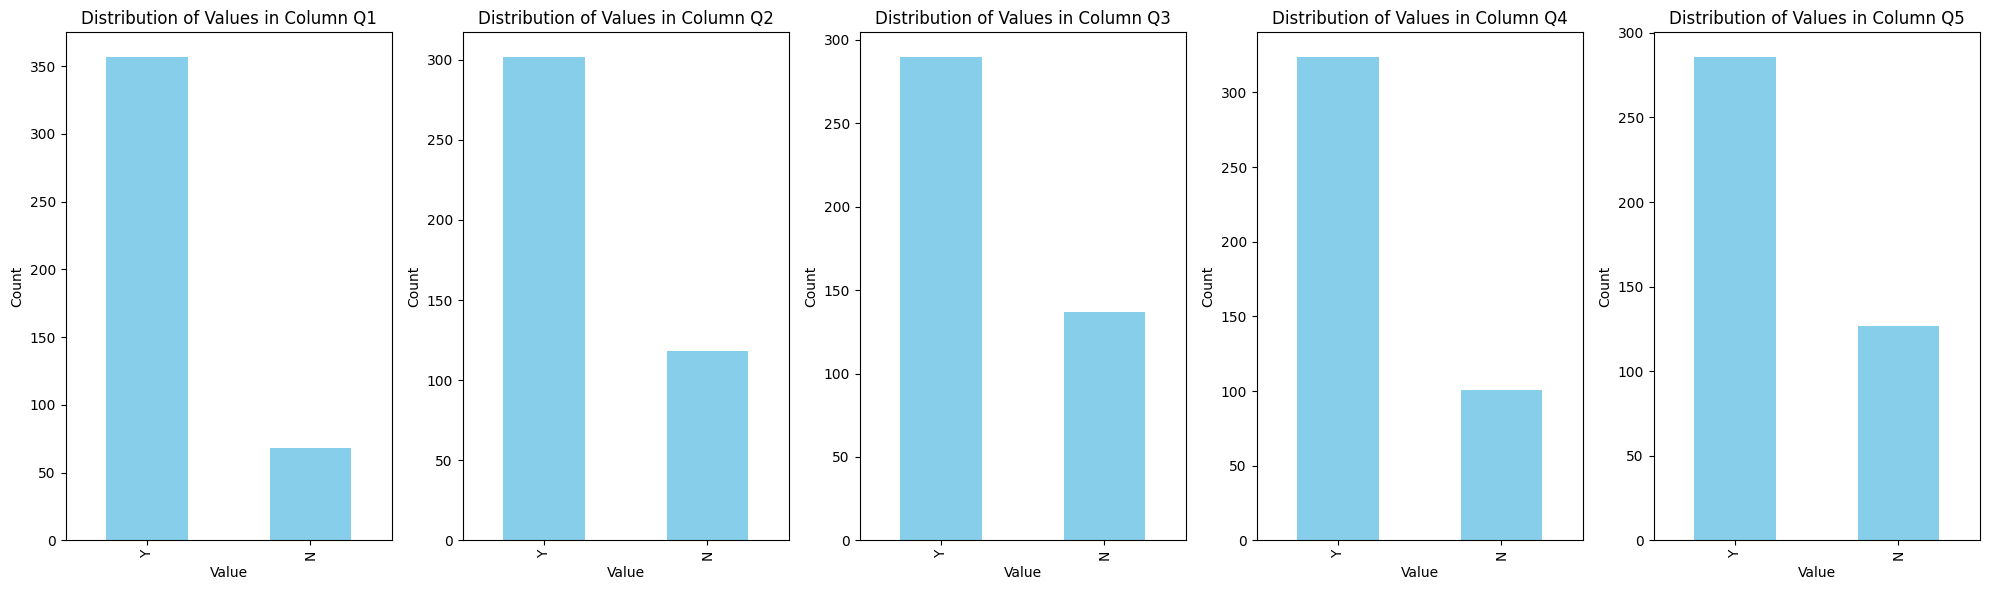

In [2]:
import matplotlib.pyplot as plt

# Define a function to plot value distribution
def plot_value_distribution(column_name, ax):
    # Check if the data is categorical or continuous
    if df[column_name].dtype == 'object':
        # Categorical data - use bar plot
        counts = df[column_name].value_counts()
        counts.plot(kind='bar', color='skyblue', ax=ax)
        ax.set_title(f'Distribution of Values in Column {column_name}')
        ax.set_xlabel('Value')
        ax.set_ylabel('Count')
    else:
        # Continuous data - use histogram
        ax.hist(df[column_name], color='blue', bins=20)
        ax.set_title(f'Distribution of Values in Column {column_name}')
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')

# Get the list of column names you want to plot
columns_to_plot = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']

# Calculate the number of subplots needed
num_plots = len(columns_to_plot)

# Create subplots
fig, axs = plt.subplots(1, num_plots, figsize=(4 * num_plots, 6))

# Plot value distribution for each question's answer column
for i, column_name in enumerate(columns_to_plot):
    plot_value_distribution(column_name, axs[i])

plt.tight_layout()
plt.show()


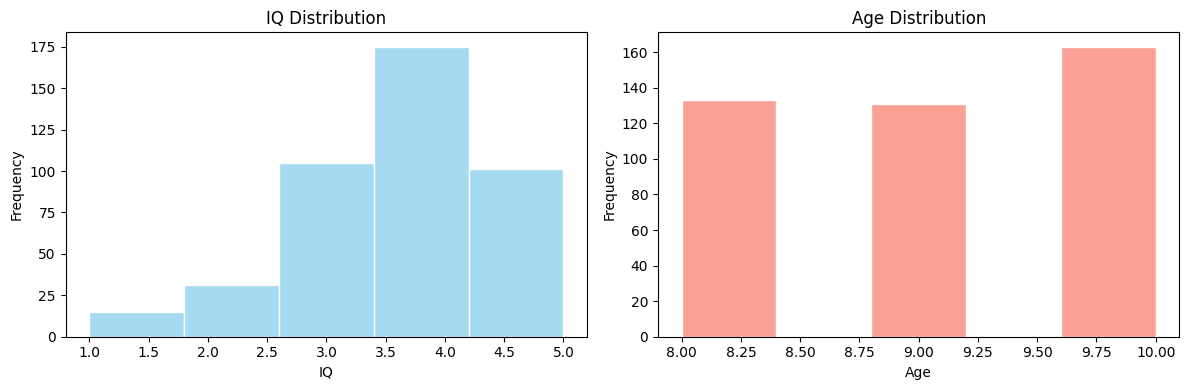

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to plot histograms
def plot_histogram(data, column_name, color, ax):
    sns.histplot(data[column_name], bins=5, color=color, edgecolor='white', ax=ax)
    ax.set_title(f'{column_name} Distribution')
    ax.set_xlabel(column_name)
    ax.set_ylabel('Frequency')

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot histograms for IQ and Age
plot_histogram(df, 'IQ', 'skyblue', axs[0])
plot_histogram(df, 'Age', 'salmon', axs[1])

plt.tight_layout()
plt.show()


## Preprocessing

In [4]:
# 1. Duplicate Values
# Check for duplicate rows
if df.duplicated().any():
    # Count duplicate rows
    num_duplicates = df.duplicated().sum()
    
    # Display duplicate rows
    duplicate_rows = df[df.duplicated()]
    print(f"{num_duplicates} duplicate rows found:")
    print(duplicate_rows)
    
    # Remove duplicate rows
    df.drop_duplicates(inplace=True)
    
    print("Duplicate rows removed.")
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [5]:
# 2. Missing Values
# Check for missing values
missing_columns = df.columns[df.isnull().any()]

# If missing values are found, display the columns with missing values and the number of missing values
if not missing_columns.empty:
    print("Missing values present:")
    for col in missing_columns:
        missing_count = df[col].isnull().sum()
        print(f"{col}: {missing_count} missing values")
else:
    print("No missing values in any column.")

Missing values present:
Q1: 2 missing values
Q2: 7 missing values
Q4: 2 missing values
Q5: 14 missing values


In [6]:
# Drop rows with missing values in 'IQ', 'Age', and 'Label' columns
df = df.dropna(subset=['IQ', 'Age', 'Label'])

# Replace missing values in questions with 'N'
columns_to_replace = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']
df.loc[:, columns_to_replace] = df.loc[:, columns_to_replace].fillna('N')

#Check again for missing values and show
missing_columns = df.columns[df.isnull().any()]
if not missing_columns.empty:
    print("Missing values present:")
    for col in missing_columns:
        missing_count = df[col].isnull().sum()
        print(f"{col}: {missing_count} missing values")
else:
    print("No missing values in any column.")

No missing values in any column.


In [7]:
# 3. Encoding Binary Variables
# Define columns for binary encoding
columns_to_encode = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']

# Encode binary values to 0s and 1s
df[columns_to_encode] = df[columns_to_encode].replace({'N': 0, 'Y': 1})

print("Binary variables 'Q1', 'Q2', 'Q3', 'Q4' and 'Q5' encoded successfully")

Binary variables 'Q1', 'Q2', 'Q3', 'Q4' and 'Q5' encoded successfully


In [8]:
# 4. One-Hot Encoding
# One-Hot encoding of the 'Label' column (target variable) with prefix 'Label'
df_encoded = pd.get_dummies(df, columns=['Label'], drop_first=True, prefix='Label')

# Rename the one-hot encoded column to 'Label'
df_encoded.rename(columns={'Label_Y': 'Label'}, inplace=True)

print("One-Hot Encoding for column Label successfully")

# Display the first 10 rows of the DataFrame
print(tabulate(df_encoded.head(50), headers='keys', tablefmt='pretty'))

One-Hot Encoding for column Label successfully
+----+----+-----+----+----+----+----+----+----+--------------+-------+
|    | ID | Age | IQ | Q1 | Q2 | Q3 | Q4 | Q5 | Time Seconds | Label |
+----+----+-----+----+----+----+----+----+----+--------------+-------+
| 0  | 1  | 10  | 5  | 1  | 0  | 0  | 0  | 0  |      60      |   1   |
| 1  | 2  | 10  | 5  | 1  | 1  | 1  | 1  | 0  |      75      |   0   |
| 2  | 3  | 10  | 4  | 0  | 0  | 0  | 0  | 0  |      62      |   1   |
| 3  | 4  | 10  | 5  | 1  | 1  | 1  | 1  | 1  |     100      |   0   |
| 4  | 6  | 10  | 3  | 0  | 0  | 0  | 0  | 0  |      20      |   1   |
| 5  | 5  | 10  | 4  | 1  | 0  | 0  | 0  | 0  |     127      |   1   |
| 6  | 9  | 10  | 4  | 1  | 1  | 1  | 1  | 1  |     170      |   0   |
| 7  | 10 | 10  | 4  | 1  | 1  | 1  | 1  | 1  |     109      |   0   |
| 8  | 11 | 10  | 4  | 0  | 0  | 0  | 0  | 0  |      70      |   1   |
| 9  | 12 | 10  | 4  | 0  | 1  | 1  | 0  | 1  |      80      |   0   |
| 10 | 13 | 10  | 4  | 1  | 0 

## Training Model

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Exclude the target variable from the features
features = df_encoded.drop(columns=['Label', 'ID'])

# Target variable
target = df_encoded['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Instantiate the Gradient Boosting Classifier
rf_classifier = GradientBoostingClassifier(random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Predict on the training and testing data
y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Convert accuracy to percentage
train_accuracy_percentage = train_accuracy * 100
test_accuracy_percentage = test_accuracy * 100

# Display training and testing accuracy
print(f"Training Accuracy: {train_accuracy_percentage:.2f}%")
print(f"Testing Accuracy: {test_accuracy_percentage:.2f}%")

Training Accuracy: 100.00%
Testing Accuracy: 92.25%


## Evaluate

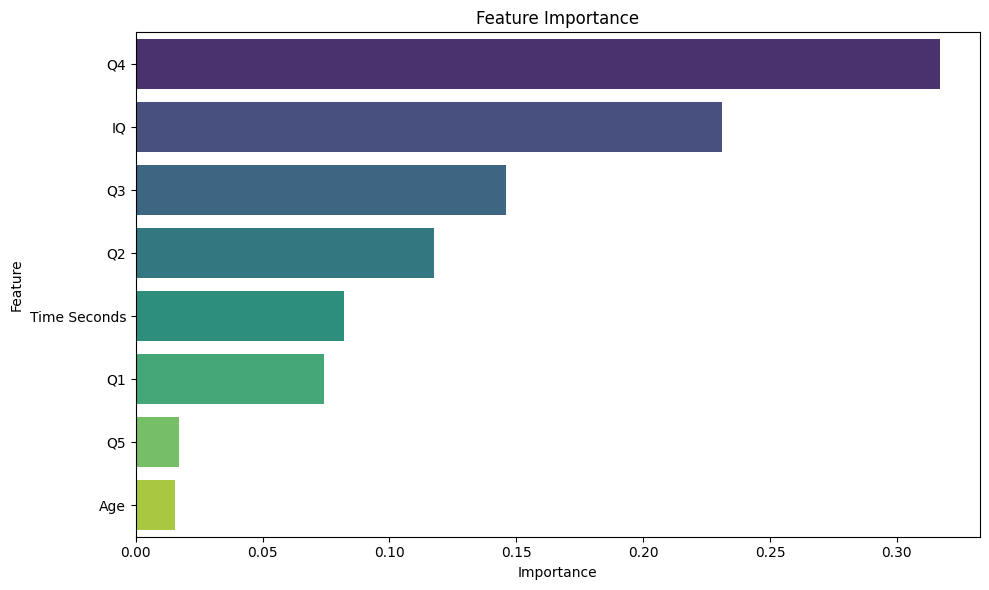

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Get feature importances from the trained RandomForestClassifier
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': features.columns, 
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


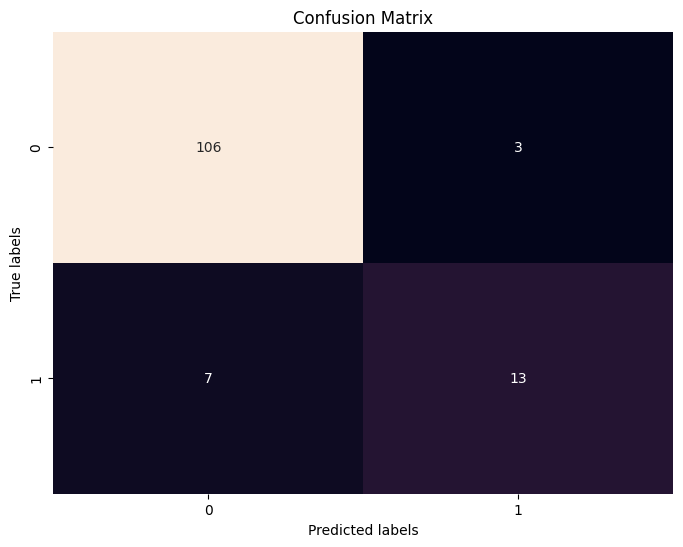

In [12]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Display confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


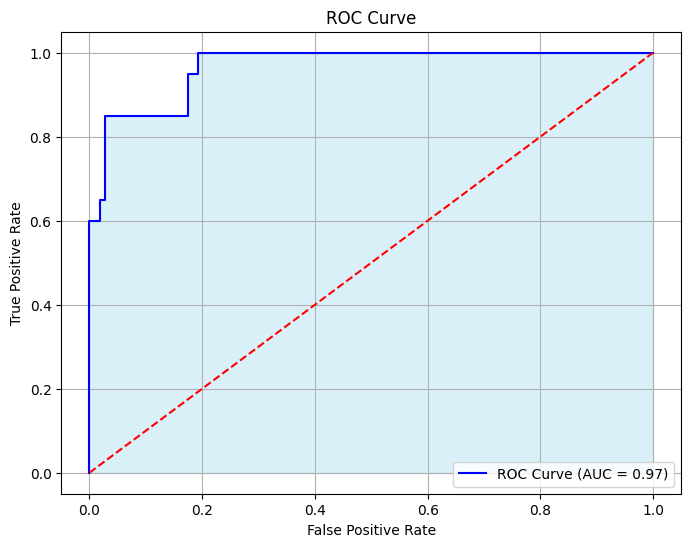

AUC Score: 0.9665137614678898


In [14]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for the test set
y_test_probs = rf_classifier.predict_proba(X_test)[:, 1]

# Predictions based on the probability threshold of 0.5
y_test_pred = (y_test_probs > 0.5).astype(int)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_probs)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_test_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.fill_between(fpr, tpr, color='skyblue', alpha=0.3)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

print("AUC Score:", auc_score)

In [15]:
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_test_pred, output_dict=True)

# Convert classification report to DataFrame
class_report_df = pd.DataFrame(class_report).transpose()

# Print the classification report DataFrame
print("Classification Report:")
print(class_report_df)


Classification Report:
              precision    recall  f1-score     support
0              0.938053  0.972477  0.954955  109.000000
1              0.812500  0.650000  0.722222   20.000000
accuracy       0.922481  0.922481  0.922481    0.922481
macro avg      0.875277  0.811239  0.838589  129.000000
weighted avg   0.918588  0.922481  0.918872  129.000000


## Prediction

In [16]:
# Assuming input_data contains the input data to be predicted
input_data = pd.DataFrame({
    'Age': [9],
    'IQ': [4],
    'Q1': [0],
    'Q2': [0],
    'Q3': [1],
    'Q4': [1],
    'Q5': [0],
    'Time Seconds': [287]
})

# Make prediction
prediction = rf_classifier.predict(input_data)

# Display the prediction
print(prediction)

[1]


## Other Algorithms

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Train and evaluate each classifier
for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_accuracy_percentage = train_accuracy * 100
    test_accuracy_percentage = test_accuracy * 100
    print(f"{clf_name}:")
    print(f"  Training Accuracy: {train_accuracy_percentage:.2f}%")
    print(f"  Testing Accuracy: {test_accuracy_percentage:.2f}%")

Random Forest:
  Training Accuracy: 100.00%
  Testing Accuracy: 91.47%
Logistic Regression:
  Training Accuracy: 98.66%
  Testing Accuracy: 93.80%
Support Vector Machine:
  Training Accuracy: 88.26%
  Testing Accuracy: 84.50%
K-Nearest Neighbors:
  Training Accuracy: 90.94%
  Testing Accuracy: 84.50%
Decision Tree:
  Training Accuracy: 100.00%
  Testing Accuracy: 88.37%


In [18]:
from sklearn.ensemble import GradientBoostingClassifier
import pickle

# Save the model
with open("word_jumbling_model.pkl", "wb") as f:
    pickle.dump(rf_classifier, f)
